The materials for this lab is adapted from Jason Brownlee.

## Binary Classification
We are going to use the Pima Diabetes dataset to classify if an individual has diabetes or not based on the input features.

In [1]:
# Preparing the Dataset

import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [2]:
# Running Logistic Regression Using sklearn

In [16]:
test_size = 0.1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
prediction_probs = model.predict_proba(X_test)
print(prediction_probs)

[[0.88346916 0.11653084]
 [0.22179422 0.77820578]
 [0.28086082 0.71913918]
 [0.76121046 0.23878954]
 [0.61090458 0.38909542]
 [0.51253901 0.48746099]
 [0.87872132 0.12127868]
 [0.64396872 0.35603128]
 [0.12525649 0.87474351]
 [0.81498682 0.18501318]
 [0.20571571 0.79428429]
 [0.86032832 0.13967168]
 [0.35225624 0.64774376]
 [0.23523867 0.76476133]
 [0.53751309 0.46248691]
 [0.77686295 0.22313705]
 [0.70398998 0.29601002]
 [0.81253845 0.18746155]
 [0.80030192 0.19969808]
 [0.8118121  0.1881879 ]
 [0.58116508 0.41883492]
 [0.72093797 0.27906203]
 [0.28630531 0.71369469]
 [0.52830496 0.47169504]
 [0.73770425 0.26229575]
 [0.75149389 0.24850611]
 [0.86823617 0.13176383]
 [0.51379841 0.48620159]
 [0.70670248 0.29329752]
 [0.65531144 0.34468856]
 [0.52750159 0.47249841]
 [0.64508587 0.35491413]
 [0.79844874 0.20155126]
 [0.34669325 0.65330675]
 [0.93017557 0.06982443]
 [0.84038721 0.15961279]
 [0.72123868 0.27876132]
 [0.7976207  0.2023793 ]
 [0.3664862  0.6335138 ]
 [0.32819623 0.67180377]


### 1. Accuracy

In [6]:
from sklearn.metrics import accuracy_score

# Calculating using our own formula:
accuracy = len(Y_pred[Y_pred==Y_test])/len(Y_test)

# Calculating using sklearn.metrics built in function:
accuracy_sklearn = accuracy_score(Y_test, Y_pred)

print(f'Accuracy is {accuracy}, {accuracy_sklearn}')

Accuracy is 0.8311688311688312, 0.8311688311688312


### 2. Confusion Matrix and Its Metrics

In [7]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)

[[44  2]
 [11 20]]


In [8]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        46
         1.0       0.91      0.65      0.75        31

    accuracy                           0.83        77
   macro avg       0.85      0.80      0.81        77
weighted avg       0.84      0.83      0.82        77



### 3. Area under ROC

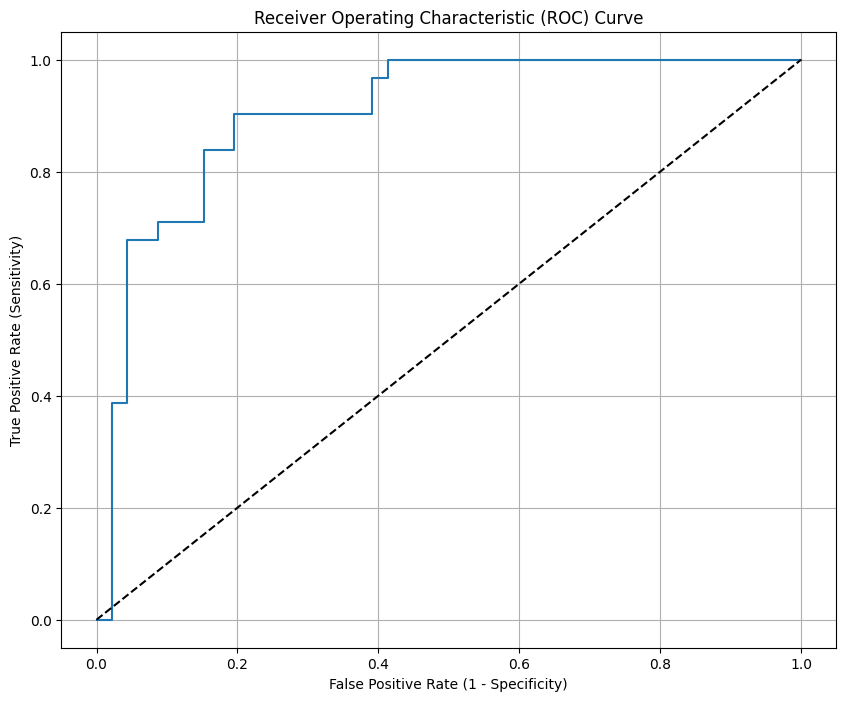

AUC: 0.9053295932678821, 0.9053295932678821


In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt

Y_pos_class = [p[1] for p in prediction_probs]

# Genearting ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pos_class)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.show()

# Calculate AUC
auc_method_1 = auc(fpr,tpr)
auc_method_2 = roc_auc_score(Y_test, Y_pos_class)
print(f'AUC: {auc_method_1}, {auc_method_2}')

### 4. Area under PRC

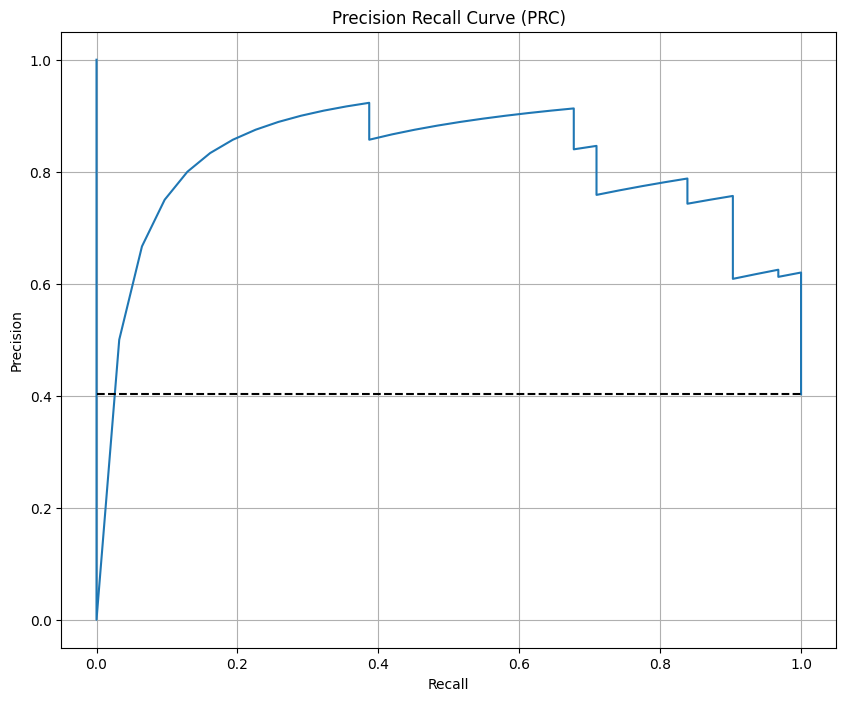

AUPRC / AP: 0.8122364115566488


In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Generating PRC
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pos_class)
baseline = len(Y_test[Y_test==1]) / len(Y_test)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label='PRC curve')
plt.plot([0, 1], [baseline, baseline], 'k--', label='Random Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve (PRC)')
plt.grid(True)
plt.show()

# Calculate AUPRC / AP
print(f'AUPRC / AP: {average_precision_score(Y_test, Y_pos_class)}')

### 5. Log Loss

In [14]:
from sklearn.metrics import log_loss

logloss = log_loss(Y_test, prediction_probs)
print(f'Log loss is {logloss}')


Log loss is 0.45788102113025003


### 6. Brier Score

In [15]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(Y_test, Y_pos_class)
print(f'Brier Score is {brier}')


Brier Score is 0.14438538777912419
